# 👪Customer segmentation
## 📌Introduction

In an era of increasingly fierce market competition, understanding customers is no longer just an advantage but has become a matter of survival for every business. Instead of applying a one-size-fits-all strategy, a personalized approach based on customer segmentation has proven to be highly effective in optimizing marketing costs, strengthening customer loyalty, and increasing sustainable revenue.

Recognizing this importance, the project “Customer Segmentation Using the RFM Model and K-Means Clustering Algorithm” was implemented with the aim of developing a customer classification process based on actual transaction data.

The project will be implemented in two main phases:

- RFM (Recency, Frequency, Monetary) Analysis: First, we will use the RFM model to evaluate and score customers based on three important attributes: Recency, Frequency, and Monetary. This is a fundamental step that helps quantify customer purchasing behavior in a visual way.

- Clustering with K-Means: To ensure that segments are defined objectively and based on the natural structure of the data, the project will apply the unsupervised machine learning algorithm K-Means Clustering to the standardized RFM dataset. Specifically, the Elbow method will be used to find the optimal number of clusters (K), ensuring that the customer groups formed are highly similar internally and distinctly different from other groups.

## 🎯 Goal
The ultimate goal of the project is to sketch out a detailed “portrait” for each customer group, thereby providing solid arguments for businesses to propose marketing strategies, customer care, and product development that are more personalized and effective.




### 1. Loading the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/online_retail.xlsx")
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info() # Describe the dataset with the necessary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


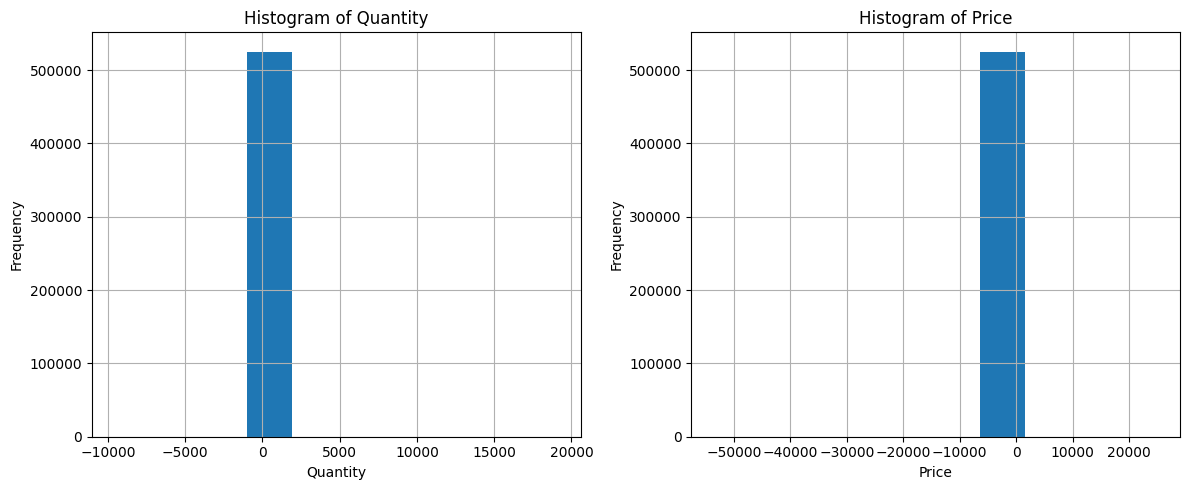

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Display the first histogram on the first subplot
df['Quantity'].hist(bins=10, ax=axs[0])
axs[0].set_title("Histogram of Quantity")
axs[0].set_xlabel('Quantity')
axs[0].set_ylabel('Frequency')

# Display the second histogram on the second subplot
df['Price'].hist(bins=10, ax=axs[1])
axs[1].set_title("Histogram of Price")
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')

# Show the figure
plt.tight_layout()
plt.show()

### 1. Explore data

#### 1.1. How many customers are there in the dataset?

In [7]:
# len(pd.unique(df['Customer ID']))

#### 1.2. Is there any abnormal type for each feature?

In [8]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [9]:
df = df[~df['Customer ID'].isna()]
df.isna().sum() # Check Null

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [10]:
# Check whether the columns are consistent with business logic
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df.shape

(407664, 8)

#### 1.3. How many unique values are there in each feature?

In [11]:
# Count unique values and rename
# df.nunique()
unique_counts = df.nunique().reset_index()
unique_counts.columns = ['Column Name', 'Unique Values']

print(unique_counts)

   Column Name  Unique Values
0      Invoice          19213
1    StockCode           4017
2  Description           4444
3     Quantity            343
4  InvoiceDate          18008
5        Price            448
6  Customer ID           4312
7      Country             37


#### 1.4. How many missing values are there in each feature?

In [12]:
# Count missing values and rename
# df.isnull().sum()
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Column Name', 'Missing Values']

print(null_counts)

   Column Name  Missing Values
0      Invoice               0
1    StockCode               0
2  Description               0
3     Quantity               0
4  InvoiceDate               0
5        Price               0
6  Customer ID               0
7      Country               0


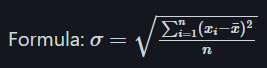

In [13]:
# Calculate the standard deviation using NumPy
# 'ddof=0' for population standard deviation; 'ddof=1' for sample standard deviation
stdev = np.std(df["Quantity"], ddof=1)
print("Standard deviation Quantity:", stdev)

Standard deviation Quantity: 96.84074727603011


#### 1.5. Are there any outliers in each feature?

In [14]:
# List of features to analyze
features = ['Quantity', 'Price']

# Calculate descriptive statistics
descriptive_stats = df[features].describe()

# Include variance and mode
descriptive_stats.loc['variance'] = df[features].var()
descriptive_stats.loc['mode'] = df[features].mode().iloc[0]

print(descriptive_stats)

               Quantity          Price
count     407664.000000  407664.000000
mean          13.585585       3.294438
std           96.840747      34.757965
min            1.000000       0.001000
25%            2.000000       1.250000
50%            5.000000       1.950000
75%           12.000000       3.750000
max        19152.000000   10953.500000
variance    9378.130333    1208.116104
mode           1.000000       1.250000


The variables R, F, and M often have skewed distributions and contain many outliers, especially Monetary. We should use a Box Plot to identify them, then consider:

a) Capping

b) Removing outliers to improve the performance of the K-Means model (which is highly sensitive to outliers).

#### 1.6. Detecting and Removing Outliers in Data Using IQR, Z-Score, Boxplot & Visualization

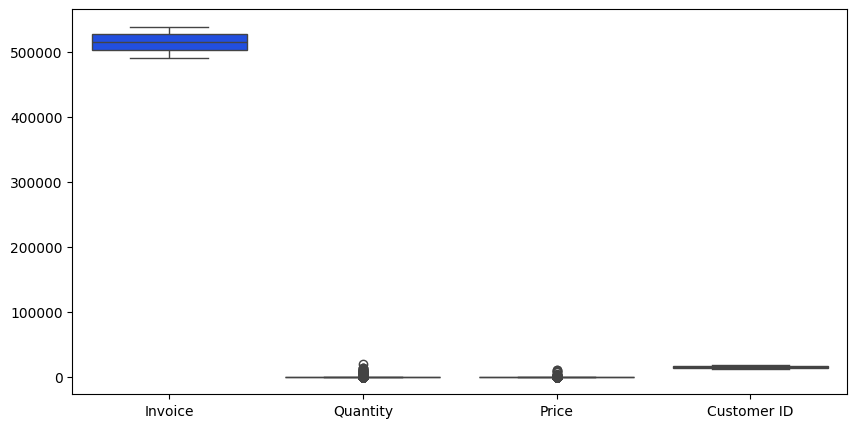

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, palette="bright")
plt.show()

In [16]:
# Find Q1, 3
threshold = 1.5
q1 = df['Price'].quantile(0.25)
print('Q1:',q1)
q3 = df['Price'].quantile(0.75)
print('Q3:',q3)
# Calculate IQR
IQR = q3 - q1
print('IQR:',IQR)
# Define max-min limit
max_limit = q3 + threshold*IQR
print('Upper bound:',max_limit)
min_limit = q1 - threshold*IQR
print('Lower bound:',min_limit)

Q1: 1.25
Q3: 3.75
IQR: 2.5
Upper bound: 7.5
Lower bound: -2.5


**Capping**

In [17]:
df['Price_2'] = np.where(df['Price'] > max_limit, max_limit,
                         np.where(df['Price'] < min_limit, min_limit, df['Price']))

In [18]:
df['Price_2']

,Price_2
0,6.95
1,6.75
2,6.75
3,2.10
4,1.25
...,...
525456,2.95
525457,3.75
525458,3.75
525459,3.75


**Visualize Distribution Comparison**

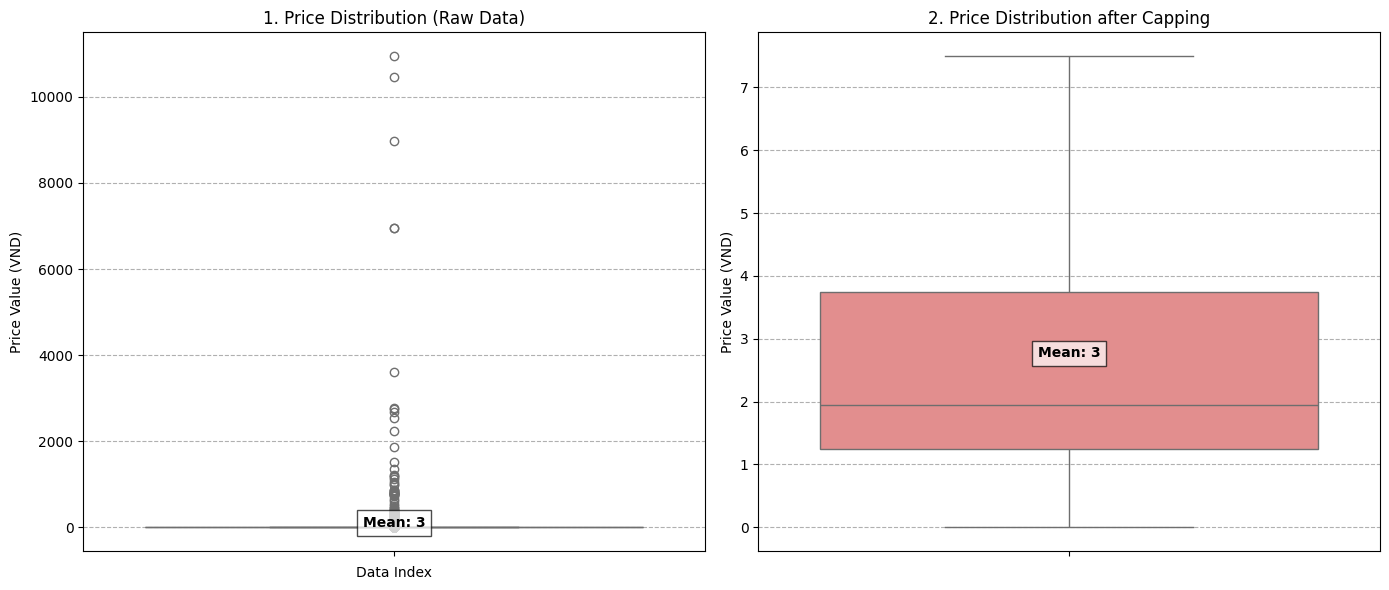

In [19]:
plt.figure(figsize=(14, 6))

# Figure 1: Original Data (Box Plot)
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Price'], color='skyblue')
plt.title('1. Price Distribution (Raw Data)')
plt.ylabel('Price Value (VND)')
plt.xlabel('Data Index')
plt.text(0, df['Price'].mean(), f'Mean: {df["Price"].mean():,.0f}',
         horizontalalignment='center', color='black', weight='bold',
         bbox=dict(facecolor='white', alpha=0.7))
plt.grid(axis='y', linestyle='--')

# Figure 2: Capped Data (Box Plot)
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price_2'], color='lightcoral')
plt.title(f'2. Price Distribution after Capping')
plt.ylabel('Price Value (VND)')
plt.text(0, df['Price_2'].mean(), f'Mean: {df["Price_2"].mean():.0f}',
         horizontalalignment='center', color='black', weight='bold',
         bbox=dict(facecolor='white', alpha=0.7))
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

1. Original Distribution (Left):
Large Range: This chart displays an enormous range of values, with most of the data concentrated at the bottom, and a long “tail” extending very high, representing outliers. Compressed Box Plot: The main box ($\text{IQR}$) and whiskers ($\text{Whiskers}$) are almost compressed into a straight line at the bottom, rendering statistical analysis meaningless.

2. Distribution After Capping (Right Side):
Reasonable Range: Extremely large outliers have been compressed down to the $\text{P99}$ threshold. Clear Box Plot: The box and whiskers are now expanded and easier to read, showing a more concentrated distribution. ML Result: The data after capping will have a much smaller standard deviation ($\sigma$) than the original data. When applying $\text{StandardScaler}$ to capped data, the maximum $\text{Z-score}$ will fall within a reasonable range (typically below 10), enabling distance-based algorithms like $\text{K-Means}$ to operate more effectively and stably.

Conclusion: Capping is a necessary preprocessing step to curb the power of outliers, creating a more “benign” data distribution before performing Z-score normalization.

***Before capping***

/tmp/ipython-input-4012951888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x='Price', palette='magma')


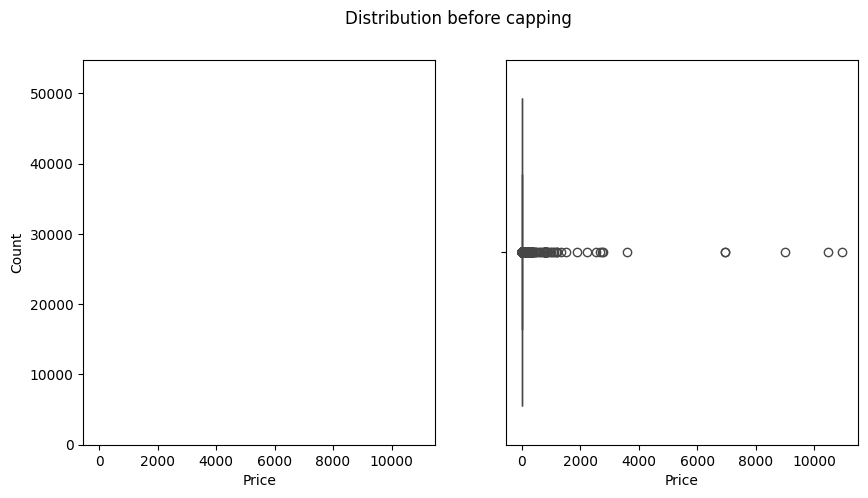

In [20]:
# Display the distribution before capping
plt.figure(figsize = (10,5))
plt.suptitle("Distribution before capping")

plt.subplot(1,2,1)
sns.histplot(data = df, x='Price')

plt.subplot(1,2,2)
sns.boxplot(data = df, x='Price', palette='magma')

plt.show()

***After capping***

/tmp/ipython-input-3719415241.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x='Price_2', palette='magma')


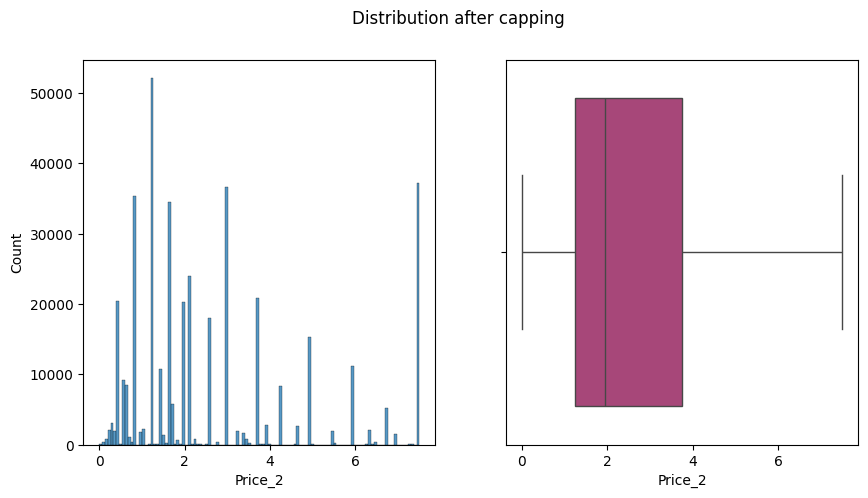

In [21]:
# Display the distribution after capping
plt.figure(figsize = (10,5))
plt.suptitle("Distribution after capping")

plt.subplot(1,2,1)
sns.histplot(data = df, x='Price_2') # df_capping_correct.to_frame()

plt.subplot(1,2,2)
sns.boxplot(data = df, x='Price_2', palette='magma')

plt.show()

In [22]:
len(df['Price']), len(df['Price_2'])

(407664, 407664)

In [23]:
df['Customer ID'] = df['Customer ID'].astype('int64')

#### 1.7. Remove the duplicates and test data where StockCode is 'TEST' or 'M'

In [24]:
remove = df[df['StockCode'].astype(str).str.contains('M|TEST')]
remove

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Price_2
1857,489594,79302M,"ART LIGHTS,FUNK MONKEY",1,2009-12-01 14:19:00,2.95,15005,United Kingdom,2.95
2845,489617,46000M,POLYESTER FILLER PAD 45x45cm,4,2009-12-01 14:59:00,1.55,13442,United Kingdom,1.55
4366,489810,46000M,POLYESTER FILLER PAD 45x45cm,4,2009-12-02 12:47:00,1.55,18108,United Kingdom,1.55
6216,489875,46000M,POLYESTER FILLER PAD 45x45cm,4,2009-12-02 15:41:00,1.55,17841,United Kingdom,1.55
6752,489916,16169M,WRAP DAISY CARPET,25,2009-12-03 10:37:00,0.42,15194,United Kingdom,0.42
...,...,...,...,...,...,...,...,...,...
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748,United Kingdom,0.19
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748,United Kingdom,2.95
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748,United Kingdom,0.19
522185,537850,16168M,FUNKY MONKEY GIFT BAG MEDIUM,24,2010-12-08 15:38:00,0.42,16722,United Kingdom,0.42


In [25]:
print("Number of duplicated transactions:", len(remove.duplicated()))

Number of duplicated transactions: 873


In [26]:
df.drop_duplicates(inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  int64         
 7   Country      400916 non-null  object        
 8   Price_2      400916 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.6+ MB


### 2. Create new features from the existing features to capture the RFM (Recency, Frequency, Monetary) of the customer.

#### 2.1. Create StockValue feature, which is the product of Quantity and Price.

In [28]:
df['StockValue'] = df['Quantity']*df['Price_2']
df['StockValue']

,StockValue
0,83.40
1,81.00
2,81.00
3,100.80
4,30.00
...,...
525456,5.90
525457,3.75
525458,3.75
525459,7.50


#### 2.2. Create Recency feature, which is the difference between InvoiceDate and InvoiceDate of the last invoice.

In [29]:
import datetime as dt
now = dt.datetime(2010,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

,InvoiceDate
0,2009-12-01 07:45:00
1,2009-12-01 07:45:00
2,2009-12-01 07:45:00
3,2009-12-01 07:45:00
4,2009-12-01 07:45:00
...,...
525456,2010-12-09 20:01:00
525457,2010-12-09 20:01:00
525458,2010-12-09 20:01:00
525459,2010-12-09 20:01:00


In [30]:
# Find the most recent orderDate.
Recency = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (now - x.max()).days}) # Current time - the most recent date when the customer visited the store to make a purchase (the last time the customer visited to make a purchase)
Recency['InvoiceDate'] = Recency['InvoiceDate'].astype(int) # For example, today is July 15, 2022. The last time I used the Shopee app to make a purchase was two months ago, so Recency = July 15, 2022 - May 15, 2022
Recency.rename(columns={'InvoiceDate': 'Recency'}, inplace=True) # The smaller the Recency, the more customers who open the app and make purchases => A positive signal

In [31]:
df = pd.merge(df, pd.DataFrame(Recency).reset_index(), on = ['Customer ID'])

In [32]:
df['Recency'].max() # The last time the customer purchased the product was 373 days ago.

373

In [33]:
df['Recency'].unique()

array([314,   1,  83,   0,  14,  77,  70, 373,   3, 326, 261,  49,  10,
         4,   6,  62,  16,  28,  15, 262,  27, 128,  21,   2,  55,  11,
        42,  13,  63, 244,  17,  56,  23,  35, 296,  72,  24,  94,   7,
       165, 302, 304,   8, 239, 181, 142, 366,  58,  39,  65, 315,  22,
       146, 372,  78,  52,  69, 196, 148, 147, 143,  30,  50, 365, 323,
       231, 268,  57,  45,  31,  41, 241,  48, 371,  25,  84, 114,   9,
       256, 233, 226, 284, 162, 105, 111,  80, 150,  60, 357,  76,  37,
        29,  98, 230, 140,  34, 156,  18,  67,  20, 370, 186, 217,  46,
       214, 115, 245,  59, 106,  44, 182, 297, 183,  66, 275,  32, 369,
       157, 175,  64,  71,  53, 368,  88,  95, 137, 119, 263, 303, 367,
       154, 113, 179,  43, 307, 122, 104, 218, 127,  73, 289,  97, 359,
       258,  38,  85,  36, 198, 170, 189, 212, 213, 135, 144,  81, 361,
        92, 269, 126, 276, 246, 247, 204, 102, 274, 129, 252, 364,  51,
       253,  87, 318, 176, 363, 107, 149, 211, 123, 319, 358, 16

In [34]:
df['Recency'].value_counts()

,count
Recency,
0,36184
1,21304
3,16949
4,15009
7,12973
...,...
369,5
242,4
332,3


#### 2.3. Create Frequency feature, which is the number of invoices of the customer.

In [35]:
Frequency = df.groupby('Customer ID').agg({'Invoice': lambda x: len(x)})
Frequency['Invoice'] = Frequency['Invoice'].astype(int)
Frequency.rename(columns={'Invoice': 'Frequency'}, inplace=True)

In [36]:
df = pd.merge(df, pd.DataFrame(Frequency).reset_index(), on = ['Customer ID'])

In [37]:
df['Frequency'].max()

5568

#### 2.4. Create Monetary feature, which is the sum of StockValue of the invoices.

Make sure that the features are in the same scale in the dataset with no missing values or outliers.

In [38]:
Monetary = df.groupby('Customer ID').agg({'StockValue': lambda x: sum(x)})
Monetary['StockValue'] = Monetary['StockValue'].astype(float)
Monetary.rename(columns={'StockValue': 'Monetary'}, inplace=True)

In [39]:
df = pd.merge(df, pd.DataFrame(Monetary).reset_index(), on = ['Customer ID'])

In [40]:
df_merge = Recency.merge(Frequency, on='Customer ID')
df_merge.head()

,Recency,Frequency
Customer ID,,
12346,164,33
12347,2,71
12348,73,20
12349,42,102
12351,10,21


In [41]:
# Merge with monetary dataframe
rfm = df_merge.merge(Monetary,on='Customer ID')
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,164,33,372.86
12347,2,71,1307.57
12348,73,20,222.16
12349,42,102,2029.19
12351,10,21,295.68


### 3. Score each quantitle of those columns

- R score for Recency: the score will be [4, 3, 2, 1] as customers who buy goods recently will have higher score
- F score for Frequency: the score will be [1, 2, 3, 4] as customers who buy goods more times will have higer score
- M score for Monetary: the score will be [1, 2, 3, 4] as customers who spend more money will have higher score

Most recent purchase: 4, most frequent purchases: 4, highest spending: 4 => RFM category 444: VIP customer

In [42]:
rfm['R'] = pd.cut(rfm['Recency'], bins=4, labels=[4,3,2,1]) # Number of days since last purchase
rfm['F'] = pd.cut(rfm['Frequency'], bins=4, labels=[1,2,3,4]) # Purchase frequency
rfm['M'] = pd.cut(rfm['Monetary'], bins=4, labels=[1,2,3,4]) # Revenue
rfm.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346,164,33,372.86,3,1,1
12347,2,71,1307.57,4,1,1
12348,73,20,222.16,4,1,1
12349,42,102,2029.19,4,1,1
12351,10,21,295.68,4,1,1


### 4. Calculate RFM category and score

- RFM category is the combine of those scores for R, F and M. Eg. R=2, F=3, M=1 then RFM category is 231.
- RFM score is the sum of scores for R, F and M. R=2, F=3, M=1 then RFM score is 6.

In [44]:
rfm['R'] = pd.cut(rfm['Recency'], bins=4, labels=[4,3,2,1]).astype(int) # Number of days since last purchase
rfm['F'] = pd.cut(rfm['Frequency'], bins=4, labels=[1,2,3,4]).astype(int) # Purchase frequency
rfm['M'] = pd.cut(rfm['Monetary'], bins=4, labels=[1,2,3,4]).astype(int) # Revenue

rfm['RFM_category_str'] = rfm.apply(
    lambda x: str(x['R']) + str(x['F']) + str(x['M']),
    axis=1
)

rfm['RFM_category'] = rfm['RFM_category_str'].astype(int)

# Calculate RFM_score
rfm['RFM_score'] = rfm[['R', 'F', 'M']].sum(axis=1)

rfm.drop(columns=['RFM_category_str'], inplace=True)
print(rfm.head())

             Recency  Frequency  Monetary  R  F  M  RFM_category  RFM_score
Customer ID                                                                
12346            164         33    372.86  3  1  1           311          5
12347              2         71   1307.57  4  1  1           411          6
12348             73         20    222.16  4  1  1           411          6
12349             42        102   2029.19  4  1  1           411          6
12351             10         21    295.68  4  1  1           411          6


In [45]:
rfm[rfm['RFM_score'] == 10] # The customer with the highest points is the most VIP customer.

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score
Customer ID,,,,,,,,
14911,0,5568,133076.81,4,4,2,442,10


<Axes: xlabel='RFM_score', ylabel='Count'>

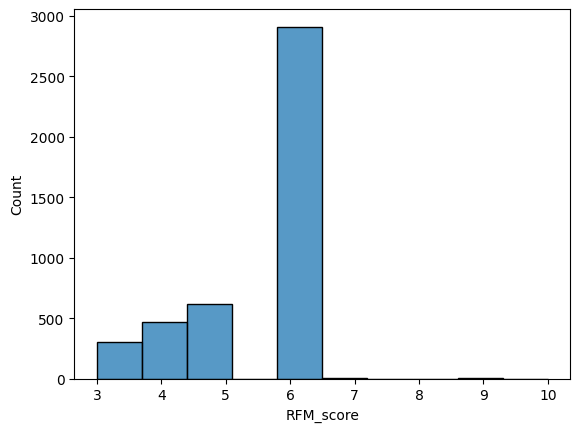

In [46]:
sns.histplot(data=rfm, x='RFM_score', bins=10)

### 5. Clustering with suitable algorithm


Perform clustering on the dataset using the algorithm that is suitable for the problem. E.g Kmeans, GMM, DBSCAN, etc. In terms of K-means, make sure to find the optimal number of clusters using the elbow method. Visualize the clusters using the above analysis. Examine the clusters formed via scatter plot.

In [47]:
from sklearn.cluster import KMeans

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400916 entries, 0 to 400915
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  int64         
 7   Country      400916 non-null  object        
 8   Price_2      400916 non-null  float64       
 9   StockValue   400916 non-null  float64       
 10  Recency      400916 non-null  int64         
 11  Frequency    400916 non-null  int64         
 12  Monetary     400916 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 39.8+ MB


In [49]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4312 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       4312 non-null   int64  
 1   Frequency     4312 non-null   int64  
 2   Monetary      4312 non-null   float64
 3   R             4312 non-null   int64  
 4   F             4312 non-null   int64  
 5   M             4312 non-null   int64  
 6   RFM_category  4312 non-null   int64  
 7   RFM_score     4312 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 303.2 KB


In [50]:
def category(RFM_score):
    if RFM_score == 3 or RFM_score == 4 or RFM_score == 5:
        return 0
    if RFM_score == 6 or RFM_score == 7:
        return 1
    if RFM_score == 8 or RFM_score == 9 or RFM_score == 10:
        return 2
    return 'unknown'

rfm['category'] = rfm['RFM_score'].apply(category) # After classification, join the classification function to the RFM_score column to create a category.
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category
Customer ID,,,,,,,,,
12346,164,33,372.86,3,1,1,311,5,0
12347,2,71,1307.57,4,1,1,411,6,1
12348,73,20,222.16,4,1,1,411,6,1
12349,42,102,2029.19,4,1,1,411,6,1
12351,10,21,295.68,4,1,1,411,6,1


In [51]:
rfm['category'].value_counts()

,count
category,
1,2918
0,1388
2,6


### 6. Create the R-rank column, R-rank-norm

**RFM score = (Recency score x Recency weight) + (Frequency score x Frequency weight) + (Monetary score x Monetary weight)**

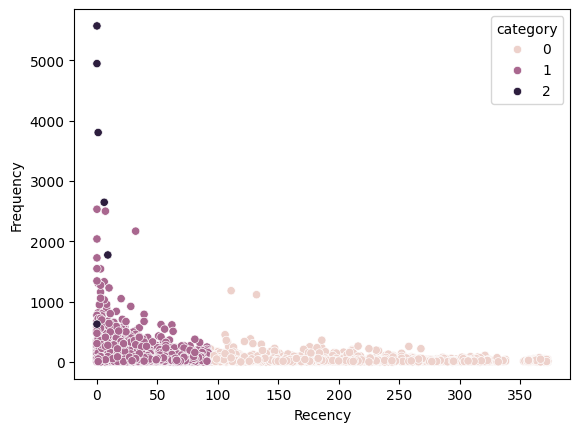

In [52]:
sns.scatterplot(data=rfm,
                x = 'Recency',
                y = 'Frequency',
                hue = 'category');

- The higher the purchase frequency 5568 (the more, the better for customer groups moving further away from 0 because they purchase more frequently).
- Recency is the most recent date a customer made a purchase at your store => customer groups moving further away from 0 are not potential customers because they left your app a long time ago (the number 373).


#### 6.1. When you know the number of groups to divide, use n_clusters

Segment customers based on RFM score:
- 0 - 50 - Low valued customer
- 50 - 75 - Medium valued customer
- 76 - 100 - High valued customer

In [53]:
X = rfm[['Recency','Frequency']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)

In [54]:
rfm['cluster'] = y_pred
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category,cluster
Customer ID,,,,,,,,,,
12346,164,33,372.86,3,1,1,311,5,0,2
12347,2,71,1307.57,4,1,1,411,6,1,0
12348,73,20,222.16,4,1,1,411,6,1,0
12349,42,102,2029.19,4,1,1,411,6,1,0
12351,10,21,295.68,4,1,1,411,6,1,0


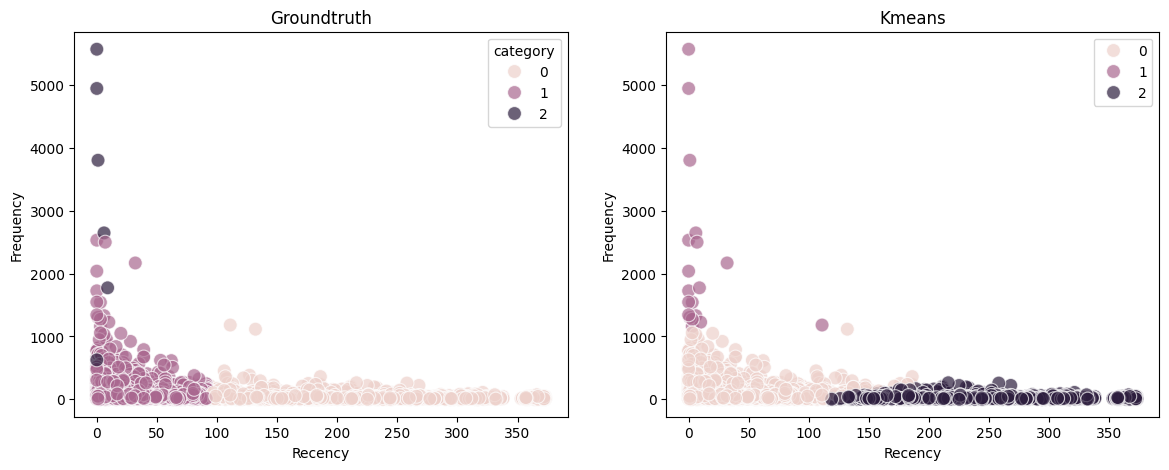

In [55]:
fig, axs = plt.subplots(1,2, figsize =(14,5))
# Original graph
ax = sns.scatterplot(data = rfm,
                     x ='Recency',
                     y ='Frequency',
                     hue = rfm['category'], # true_label
                     s=100,
                     alpha=0.7,
                     ax=axs[0])
ax.set_title('Groundtruth')

# After cluster graph
ax = sns.scatterplot(data = rfm,
                     x ='Recency',
                     y ='Frequency',
                     hue = y_pred, # pred_label
                     s=100,
                     alpha=0.7,
                     ax=axs[1])
ax.set_title('Kmeans')
plt.show()

Before clustering, the values were scattered everywhere. After using Kmeans, the data was clearly distinguished into groups.

In [56]:
y_test = rfm['category']

In [57]:
kmeans.cluster_centers_

array([[  39.89081183,  103.41472624],
       [  10.10526316, 2189.31578947],
       [ 234.85112108,   27.50403587]])

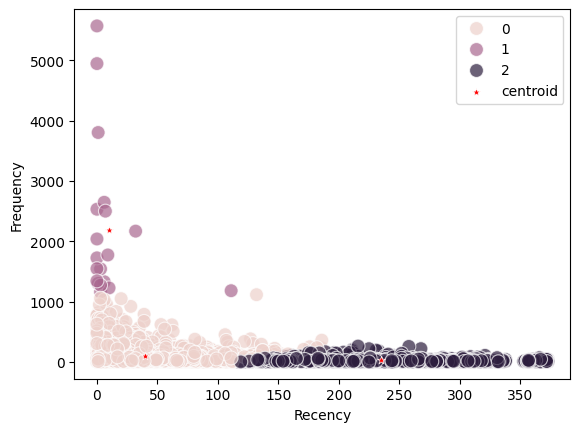

In [58]:
ax = sns.scatterplot(data=rfm,
                    x='Recency',
                    y='Frequency',
                    hue = kmeans.labels_,
                    s=100, alpha=0.7)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.legend()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.20      0.12      1388
           1       0.68      0.00      0.01      2918
           2       0.00      0.00      0.00         6

    accuracy                           0.07      4312
   macro avg       0.26      0.07      0.04      4312
weighted avg       0.49      0.07      0.04      4312



### 7. Normalization using min-max scaler

#### 7.1. Normalization

In [60]:
from sklearn.preprocessing import MinMaxScaler # min-max scaling
scaler = MinMaxScaler()

scaler.fit(rfm[['Recency','Frequency']])
rfm[['Recency','Frequency']] = scaler.transform(rfm[['Recency','Frequency']])

scaler.fit(rfm[['cluster']])
rfm['cluster'] = scaler.transform(rfm[['cluster']])

In [61]:
rfm[['Recency','Frequency']]

,Recency,Frequency
Customer ID,,
12346,0.439678,0.005748
12347,0.005362,0.012574
12348,0.195710,0.003413
12349,0.112601,0.018143
12351,0.026810,0.003593
...,...,...
18283,0.045576,0.038800
18284,0.176944,0.004850
18285,0.790885,0.001976


In [62]:
rfm['cluster']

,cluster
Customer ID,
12346,1.0
12347,0.0
12348,0.0
12349,0.0
12351,0.0
...,...
18283,0.0
18284,0.0
18285,1.0


In [63]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category,cluster
Customer ID,,,,,,,,,,
12346,0.439678,0.005748,372.86,3,1,1,311,5,0,1.0
12347,0.005362,0.012574,1307.57,4,1,1,411,6,1,0.0
12348,0.195710,0.003413,222.16,4,1,1,411,6,1,0.0
12349,0.112601,0.018143,2029.19,4,1,1,411,6,1,0.0
12351,0.026810,0.003593,295.68,4,1,1,411,6,1,0.0


In [64]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(rfm[['Recency','Frequency']])
y_pred

array([0, 2, 2, ..., 1, 0, 2], dtype=int32)

In [65]:
km.cluster_centers_

array([[0.37444147, 0.00857478],
       [0.75244819, 0.00448456],
       [0.08344764, 0.02163045]])

In [66]:
rfm['cluster'].unique()

array([1. , 0. , 0.5])

In [67]:
rfm['cluster'] = y_pred
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category,cluster
Customer ID,,,,,,,,,,
12346,0.439678,0.005748,372.86,3,1,1,311,5,0,0
12347,0.005362,0.012574,1307.57,4,1,1,411,6,1,2
12348,0.195710,0.003413,222.16,4,1,1,411,6,1,2
12349,0.112601,0.018143,2029.19,4,1,1,411,6,1,2
12351,0.026810,0.003593,295.68,4,1,1,411,6,1,2


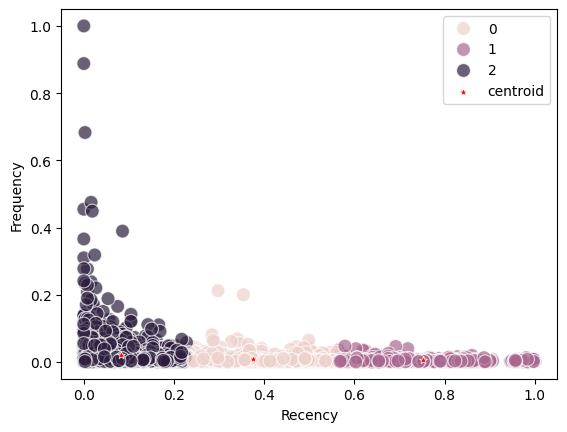

In [68]:
ax = sns.scatterplot(data=rfm[['Recency','Frequency']],
                    x='Recency',
                    y='Frequency',
                    hue = rfm['cluster'],
                    s=100, alpha=0.7)
sns.scatterplot(x=km.cluster_centers_[:,0], y = km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.legend()

### 8. Elbow Plot

When the number of groups to be divided is unknown, we can use the Elbow technique.

In [69]:
# Inertia
km.inertia_

36.484172771072274

In [70]:
# For loop - k [1,10]
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append((i, km.inertia_))
sse

[(1, 211010679.30983338),
 (2, 127127078.56310064),
 (3, 90637205.70721634),
 (4, 63475692.087698705),
 (5, 33335770.96212771),
 (6, 23958716.395625383),
 (7, 19953822.073439352),
 (8, 15725325.050196432),
 (9, 12989659.34963566)]

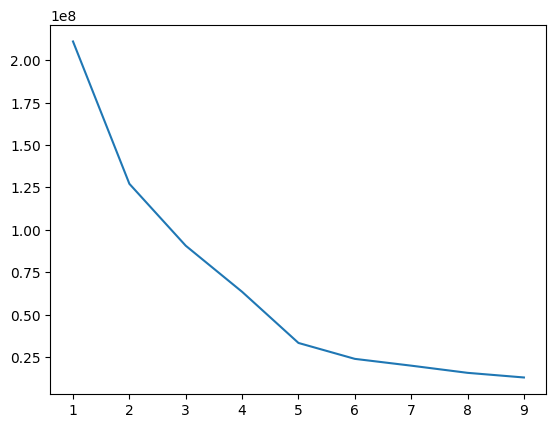

In [71]:
sse = np.array(sse)
plt.plot(sse[:,0], sse[:,1])
plt.show()

To determine the optimal number of clusters, we must select the value of k at the elbow point, which is the point after which the deformation/inertia begins to decrease linearly. Therefore, for the given data, we conclude that the optimal number of clusters for the data is 5.
#### Key points when using K-means
- Choose the optimal k
- Handle outliers before K-means
- Handle feature transformation before K-means: The nature of K-means relies on distance, so clustering results will be affected

=> Data must be standardized before being fed into the model